In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
saved_models_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v7_TITAN/"
jax_data_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/"

In [3]:
len(os.listdir(saved_models_dir))

72

In [4]:
all_configs = []
all_configs.append({
    "diversity_loss_coef": 1.0,
    "entropy_loss_coef": 1.0,
})
all_configs.append({
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
})
all_configs.append({
    "diversity_loss_coef": 10.0,
    "entropy_loss_coef": 10.0,
})

In [5]:
all_predicted_exps = {}
all_predicted_exps["designed_for"] = []
all_predicted_exps["sequence"] = []
all_predicted_exps["design_model"] = []
all_predicted_exps["diversity_loss_coef"] = []
all_predicted_exps["entropy_loss_coef"] = []

for cell in ["THP1", "Jurkat", "K562"]:
    all_predicted_exps[cell] = []

for model in sorted(os.listdir(os.path.join(jax_data_dir, "trained_predictors_new_loss"))):
    for diff_exp_cell_ind, cell in enumerate(["THP1", "Jurkat", "K562"]):
        for config in all_configs:
            diversity_loss_coef = config["diversity_loss_coef"]
            entropy_loss_coef = config["entropy_loss_coef"]

            experiment_id = f"{cell}_using_{model}_div_coef_{diversity_loss_coef}_ent_coef_{entropy_loss_coef}"
            
            print(experiment_id)
            
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences_predicted_exps = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            final_sequences = np.argmax(final_sequences, axis=-1)
            final_sequences = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_sequences)
            
            all_predicted_exps["designed_for"].extend([cell]*len(final_sequences_predicted_exps))
            all_predicted_exps["sequence"].extend(final_sequences)
            all_predicted_exps["design_model"].extend([model]*len(final_sequences_predicted_exps))
            all_predicted_exps["diversity_loss_coef"].extend([diversity_loss_coef]*len(final_sequences_predicted_exps))
            all_predicted_exps["entropy_loss_coef"].extend([entropy_loss_coef]*len(final_sequences_predicted_exps))
            
            for i, exp_cell in enumerate(["THP1", "Jurkat", "K562"]):
                all_predicted_exps[exp_cell].extend(final_sequences_predicted_exps[:, i])
                
all_predicted_exps = pd.DataFrame(all_predicted_exps)

THP1_using_coms_0.03_total_rounds_2.pkl_div_coef_1.0_ent_coef_1.0
THP1_using_coms_0.03_total_rounds_2.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.03_total_rounds_2.pkl_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.03_total_rounds_2.pkl_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.03_total_rounds_2.pkl_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.03_total_rounds_2.pkl_div_coef_10.0_ent_coef_10.0
K562_using_coms_0.03_total_rounds_2.pkl_div_coef_1.0_ent_coef_1.0
K562_using_coms_0.03_total_rounds_2.pkl_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.03_total_rounds_2.pkl_div_coef_10.0_ent_coef_10.0
THP1_using_coms_0.03_total_rounds_5.pkl_div_coef_1.0_ent_coef_1.0
THP1_using_coms_0.03_total_rounds_5.pkl_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.03_total_rounds_5.pkl_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.03_total_rounds_5.pkl_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.03_total_rounds_5.pkl_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.03_total_rounds_5.pkl_div_coef_10.0_en

In [6]:
all_predicted_exps["sequence"] = all_predicted_exps.apply(lambda x: "".join(x["sequence"]), axis=1)

In [7]:
all_predicted_exps

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562
0,THP1,GAGGAGGACCCGGAAGCAGAACCGGAAGCGACCTGCAGCGGAAGCT...,coms_0.03_total_rounds_2.pkl,1.0,1.0,2.261331,0.221922,0.722230
1,THP1,GAGGAGGACCCGGAAGCAGAACCGGAAGCTGCAGCGGAAGCAGCAG...,coms_0.03_total_rounds_2.pkl,1.0,1.0,2.216617,0.092736,0.518238
2,THP1,GAGGAGGACCCGGAAGCAGAACCGGAAGCGGCACCGGAAGCTGCAG...,coms_0.03_total_rounds_2.pkl,1.0,1.0,2.337592,0.397214,0.795609
3,THP1,GAGGAAGACCCGGAAGCAGGACGGACCGGAAGCGGCGAGAAGCGGA...,coms_0.03_total_rounds_2.pkl,1.0,1.0,2.367699,0.382793,0.811685
4,THP1,GAGGAGGACCCGGAAGCAGAACCGGAAGCTGCAACGGAAGCGGCAG...,coms_0.03_total_rounds_2.pkl,1.0,1.0,2.108696,0.136111,0.446256
...,...,...,...,...,...,...,...,...
1439995,K562,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.3_total_rounds_5.pkl,10.0,10.0,0.421150,1.552711,2.098665
1439996,K562,GTCATGTGATATGATGTCATGTATGTTGTGATTTGTGAAATATGTA...,coms_0.3_total_rounds_5.pkl,10.0,10.0,-0.310718,0.053841,0.121286
1439997,K562,GAGAGAGAGAGGCGCGAGAGGCGCAGACGAGACGACACCCCACCCC...,coms_0.3_total_rounds_5.pkl,10.0,10.0,0.424730,1.577949,2.083426
1439998,K562,CCCCCCCCCCCCCCCCCCACACCCCCCCCCCCACACACACCCCCCC...,coms_0.3_total_rounds_5.pkl,10.0,10.0,0.141203,1.298583,1.763479


THP1


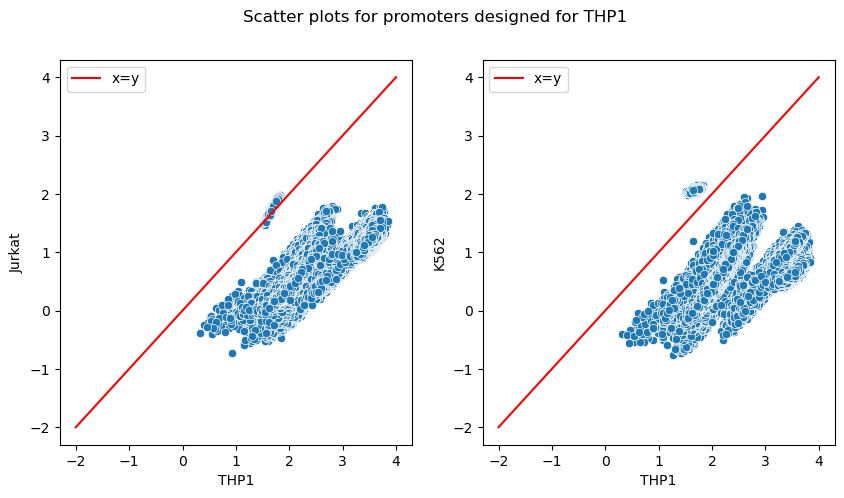

Jurkat


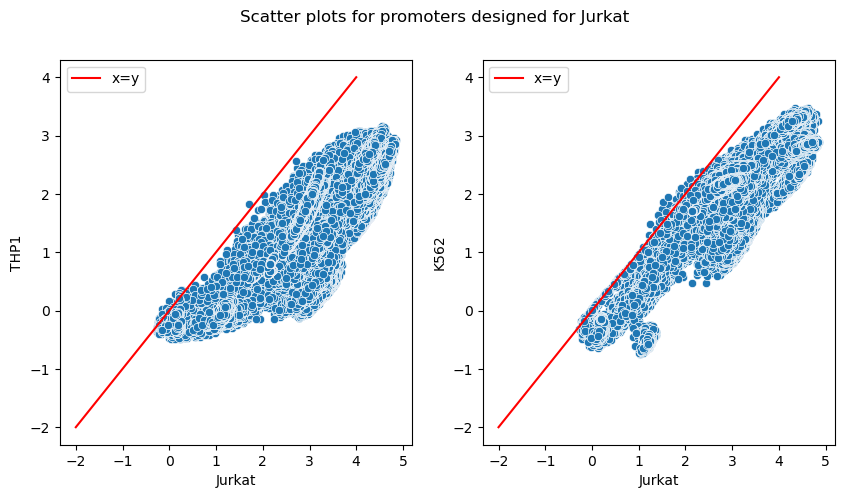

K562


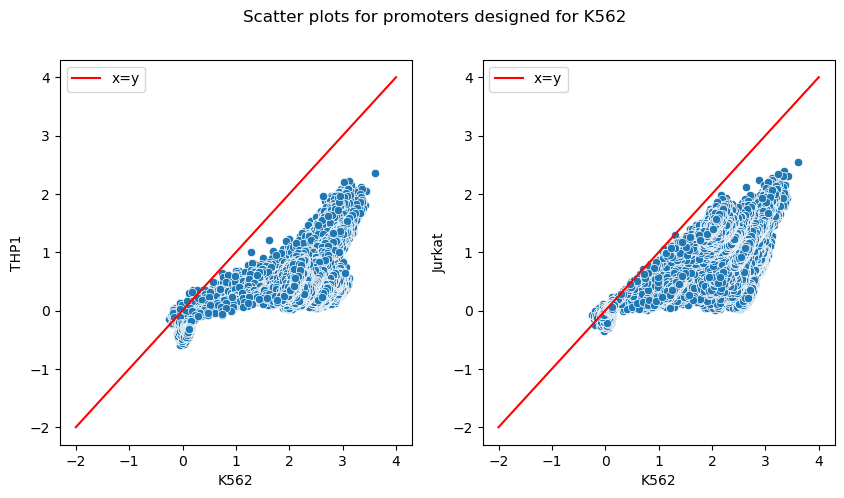

In [8]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

In [9]:
# for cell in ["THP1", "Jurkat", "K562"]:
cell = "THP1"
print(cell)
other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]

seqs_designed_for_cell = all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True)
seqs_designed_for_cell["max_diff"] = seqs_designed_for_cell[cell] - np.max(seqs_designed_for_cell[other_cells], axis=1)
seqs_designed_for_cell = seqs_designed_for_cell.sort_values(by="max_diff", ascending=False)

THP1


In [10]:
seqs_designed_for_cell

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562,max_diff
435365,THP1,GGAAGCATTCCGTAGTATACGATTGCGTTTCCGGTCATTTAAACCG...,coms_0.3_total_rounds_5.pkl,1.0,1.0,3.560453,1.055017,0.594113,2.505436
423469,THP1,GGAAGCATTACGTAGTATACGATTGCGTTTCCGGTCATTTTAACCG...,coms_0.3_total_rounds_5.pkl,1.0,1.0,3.597970,1.095554,0.654039,2.502416
420607,THP1,GGAAGCATTCCGTAGTATACGATTGCGTTTCCGGTCATTTAAAGCG...,coms_0.3_total_rounds_5.pkl,1.0,1.0,3.531368,1.030610,0.615798,2.500758
423754,THP1,GGAAGCATTACGTAGTATACGATTGCGTTTCCGGTCATTTAAAACG...,coms_0.3_total_rounds_5.pkl,1.0,1.0,3.540111,1.041031,0.619492,2.499080
428994,THP1,GGAAGCATTACGTAGTATACGATTGCGTTTCCGGTCATTTAAGCCG...,coms_0.3_total_rounds_5.pkl,1.0,1.0,3.529691,1.033061,0.613449,2.496630
...,...,...,...,...,...,...,...,...,...
172363,THP1,GCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_total_rounds_2.pkl,10.0,10.0,1.552643,1.554776,2.069763,-0.517120
176789,THP1,CCGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_total_rounds_2.pkl,10.0,10.0,1.521479,1.538571,2.040293,-0.518814
169467,THP1,CGGACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_total_rounds_2.pkl,10.0,10.0,1.524652,1.480060,2.047706,-0.523055
165182,THP1,CGGGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,coms_0.0_total_rounds_2.pkl,10.0,10.0,1.529167,1.503923,2.057395,-0.528228


In [11]:
all_predicted_exps.to_parquet(os.path.join(jax_data_dir, "final_sequences_v7.parquet"), index=False)